In [1]:
# to work with dataframes

import pandas as pd

In [2]:
# to perform numerical operation

import numpy as np

In [3]:
# to visualize data

import seaborn as sns

In [4]:
# to partition the data

from sklearn.model_selection import train_test_split

In [5]:
# importing library for logistic regression

from sklearn.linear_model import LogisticRegression

In [6]:
# importing performances matrices - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
data_income = pd.read_csv("C:/Users/pc/Downloads/income(1).csv")

In [8]:
data = data_income.copy()

In [9]:
data.shape

(31978, 13)

In [10]:
# to check 'variables' data type

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [11]:
# check for missing values
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [13]:
#summary of numerical variable

summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [14]:
# summary of categorical variable

summary_cate = data.describe(include = 'O')  ## note:- O always in capital letter
print(summary_cate)  # unique output shows no. of unique type in particular column

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [15]:
# frequency for each category

(data['JobType'].value_counts())


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [16]:
(data['occupation'].value_counts())

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
#  checking unique  class
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


   - There exist '?' instead of NaN
    + Go back and read the data by including "na_values[' ? ']" to consider '?' as nan

In [18]:
data = pd.read_csv("C:/Users/pc/Downloads/income(1).csv",na_values = [" ?"])

In [19]:
data.shape

(31978, 13)

In [20]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [21]:
# axis=1  => to consider atleast one column values is missing

missing = data[data.isnull().any(axis=1)]

In [22]:
missing.shape

(1816, 13)

In [23]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [24]:
# we removing missing data
data2 = data.dropna(axis=0)

In [25]:
data2.shape

(30162, 13)

In [26]:
# Relation between independent variable
correlation = data2.corr()

In [27]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# Cross tables & Data Visualization

In [28]:
# extracting the columns name
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [29]:
# Gender proportion tables:

gender = pd.crosstab(index = data2["gender"],
                    columns = 'count',
                    normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [30]:
# Gender vs Salary Status

gender_salstat = pd.crosstab(index = data2["gender"],
                            columns = data2["SalStat"],
                            margins = True,
                            normalize = 'index')

print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

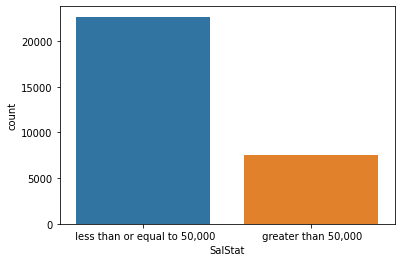

In [31]:
# frequency distribution of 'salary statues'

SalStat = sns.countplot(data2['SalStat'])
SalStat

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

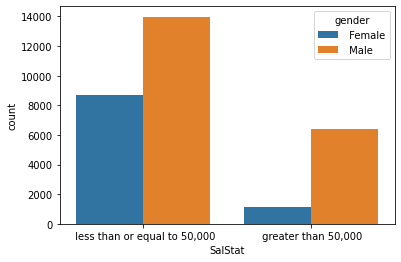

In [32]:
SalStat1 = sns.countplot(data2['SalStat'],hue = data2['gender'])
SalStat1

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

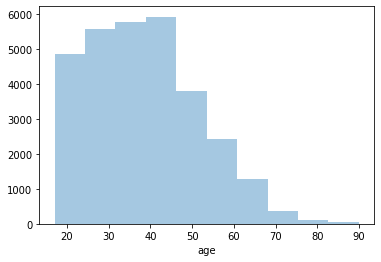

In [33]:
# histogram of age
sns.distplot(data2['age'],bins=10,kde= False) # it shows that 20-45 age are high in frequency

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

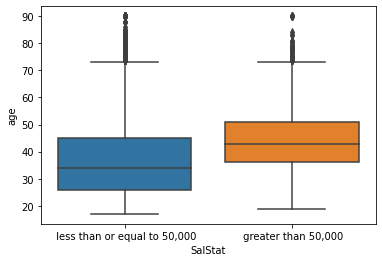

In [34]:
# Box plot - Age vs Salary Status
sns.boxplot('SalStat','age',data = data2)

In [35]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [36]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

# LOGISTIC REGRESSION

In [37]:
# Reindexing the salary status names to 0,1
data2['SalStat']= data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

C:\Users\pc\AppData\Local\Temp\ipykernel_7036\4010477368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']= data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [38]:
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [39]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [40]:
# converting categorical variable into dummy variable (each variable converted to seprate column in 0,1)

new_data = pd.get_dummies(data2,drop_first = True)

In [41]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [43]:
# seprating the input names from data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ England', 'nativecountry_ Holand-Netherlands', 'nativecountry_ France', 'nativecountry_ Hong', 'nativecountry_ South', 'nativecountry_ Ireland', 'JobType_ Self-emp-not-inc', 'EdType_ 12th', 'race_ Asian-Pac-Islander', 'maritalstatus_ Separated', 'maritalstatus_ Married-AF-spouse', 'nativecountry_ Puerto-Rico', 'EdType_ Assoc-voc', 'nativecountry_ Laos', 'age', 'nativecountry_ Vietnam', 'nativecountry_ Dominican-Republic', 'JobType_ State-gov', 'nativecountry_ Thailand', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'hoursperweek', 'JobType_ Local-gov', 'race_ Other', 'occupation_ Armed-Forces', 'nativecountry_ Japan', 'relationship_ Not-in-family', 'EdType_ Some-college', 'nativecountry_ Jamaica', 'occupation_ Farming-fishing', 'nativecountry_ Scotland', 'nativecountry_ Canada', 'relationship_ Wife', 'nativecountry_ Poland', 'nativecountry_ Peru', 'occupation_ Protective-serv', 'relationship_ Unmarried', 'EdType_ 11th', 'maritalstatus_ Never-married', 'EdType_ Masters',

In [44]:
# storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [45]:
# sorting the values from input features

x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [46]:
# splitting the data into train and test

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [47]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(21113, 94)
(21113,)
(9049, 94)
(9049, 94)


In [48]:
# make an instance of the model
logistic = LogisticRegression()

In [49]:
# fitting the values for x and y

logistic.fit(train_x,train_y)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
logistic.coef_

array([[ 1.26923721e-02, -8.91526493e-04,  5.70861428e-03,
        -1.26253399e-03, -2.65388164e-02, -3.88058476e-03,
        -5.82784299e-01, -9.57708299e-02, -1.17887387e-01,
        -1.79322291e-01,  1.64989232e-02, -4.13549362e-02,
        -3.85483383e-02, -6.14703955e-03,  4.45566065e-04,
        -3.36813601e-02, -2.56952152e-02, -1.26744601e-01,
        -3.33673873e-03, -7.41286960e-03,  9.04243981e-03,
        -2.47968470e-01, -8.39542562e-02, -1.93931858e-03,
        -4.76908676e-04, -4.99369307e-01, -3.95522061e-01,
        -1.19752545e-02, -3.90038130e-01, -3.29443391e-03,
         3.59437591e-03,  2.46254759e-01, -9.34546335e-03,
        -1.20769696e-02, -1.42075503e-02, -5.75402257e-01,
        -3.04357718e-01, -1.34722159e+00,  5.26390966e-01,
         1.17008428e-01, -3.21657225e-01,  1.13284296e+00,
        -4.25059820e-01, -3.96517522e-02,  3.16745560e-04,
        -5.83564946e-02,  8.97096399e-01, -2.24466347e-03,
        -3.27147666e-03,  2.33833941e-01, -2.02801283e-0

In [51]:
logistic.intercept_

array([-1.04051432])

In [52]:
# prediction from the test data

prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [53]:
#  Confusion matrix

confusion_matrix = confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6291  532]
 [ 946 1280]]


In [54]:
# Calculating the accuracy

accuracy_score = accuracy_score(test_y,prediction)
print(accuracy_score)

0.8366670350314952


In [55]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1478


## LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

In [59]:
data = pd.read_csv("C:/Users/pc/Downloads/income(1).csv",na_values = [" ?"])
data2 = data.copy()

In [60]:
print(data2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [61]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [62]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64

In [63]:
cols = ['gender','nativecountry','race','JobType']

In [64]:
new_data = data2.drop(cols,axis =1)

In [65]:
new_data

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [66]:
new_data = pd.get_dummies(new_data, drop_first = True)

In [68]:
new_data.shape

(31978, 44)

In [2]:
df[col_list]

NameError: name 'df' is not defined